Capstone Project 2:
Predicting Energy Efficiency:
Objective: Predict the energy efficiency of buildings based on features like wall area, roof area, and overall height.
Techniques: Use algorithms like: Linear Regression, Decision Trees, Support Vector Machines, etc.
Tools: Python, Scikit-Learn, Pandas, Seaborn/Matplotlib.
Dataset: Download any Energy Efficiency dataset available from Kaggle or any other public websites.
General Project Execution Steps:
Data Collection: Source or create the dataset needed for the project.
Data Preprocessing: Clean, transform, and prepare the data for modeling.
EDA: Analyze the data to understand distributions and relationships.
Model Development: Train machine learning models to predict the target variable.
Model Evaluation: Use appropriate metrics to evaluate the performance of your model.
Optimization: Fine-tune the model through hyperparameter tuning.
API: Pickle the model file and Create user testing API using any web framework for demonstration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\aditya.devdhe\Downloads\EnergyData.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [3]:
'''X1: Relative Compactness
X2: Surface Area
X3: Wall Area
X4: Roof Area 
X5: Overall Height
X6: Orientation
X7: Glazing Area 
X8: Glazing Area Distribution
'''

'X1: Relative Compactness\nX2: Surface Area\nX3: Wall Area\nX4: Roof Area \nX5: Overall Height\nX6: Orientation\nX7: Glazing Area \nX8: Glazing Area Distribution\n'

In [4]:
df.isnull().sum()

X1              528
X2              528
X3              528
X4              528
X5              528
X6              528
X7              528
X8              528
Y1              528
Y2              528
Unnamed: 10    1296
Unnamed: 11    1296
dtype: int64

In [5]:
for i in range(1,9):
      df[f'X{i}']= df[f'X{i}'].fillna(df[f'X{i}'].mean())

In [6]:
for i in range(1,3):
      df[f'Y{i}']= df[f'Y{i}'].fillna(df[f'Y{i}'].mean())

In [7]:
df.isnull().sum()

X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
X8                0
Y1                0
Y2                0
Unnamed: 10    1296
Unnamed: 11    1296
dtype: int64

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,0.0,0.0
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.234375,2.812500,22.307201,24.587760,NaN,NaN
std,0.081406,67.790722,33.574765,34.759534,1.347671,0.860995,0.102526,1.193612,7.765374,7.321402,NaN,NaN
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000,NaN,NaN
25%,0.740000,661.500000,318.500000,147.000000,3.500000,3.000000,0.234375,2.000000,15.417500,18.945000,NaN,NaN
50%,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.234375,2.812500,22.307201,24.587760,NaN,NaN
75%,0.764167,686.000000,318.500000,220.500000,7.000000,4.000000,0.250000,3.000000,24.717500,27.332500,NaN,NaN
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           1296 non-null   float64
 1   X2           1296 non-null   float64
 2   X3           1296 non-null   float64
 3   X4           1296 non-null   float64
 4   X5           1296 non-null   float64
 5   X6           1296 non-null   float64
 6   X7           1296 non-null   float64
 7   X8           1296 non-null   float64
 8   Y1           1296 non-null   float64
 9   Y2           1296 non-null   float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x18430de5040>,
 'caps': [<matplotlib.lines.Line2D at 0x18430de55b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18430de4da0>],
 'medians': [<matplotlib.lines.Line2D at 0x18430de5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x18430de5e50>],
 'means': []}

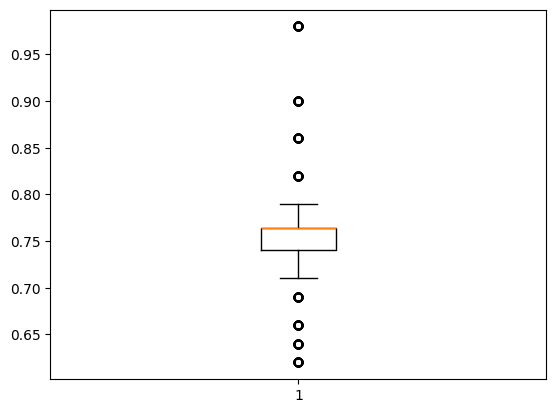

In [10]:
plt.boxplot(df['X1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18430ea8d40>,
 'caps': [<matplotlib.lines.Line2D at 0x18430ea9310>,
 'boxes': [<matplotlib.lines.Line2D at 0x18430ea8a40>],
 'medians': [<matplotlib.lines.Line2D at 0x18430ea9880>],
 'fliers': [<matplotlib.lines.Line2D at 0x18430ea9b20>],
 'means': []}

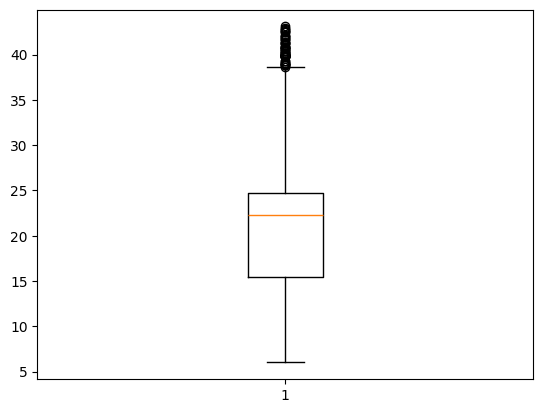

In [11]:
plt.boxplot(df['Y1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18430f20950>,
 'caps': [<matplotlib.lines.Line2D at 0x18430f20ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18430f206b0>],
 'medians': [<matplotlib.lines.Line2D at 0x18430f214c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18430f21730>],
 'means': []}

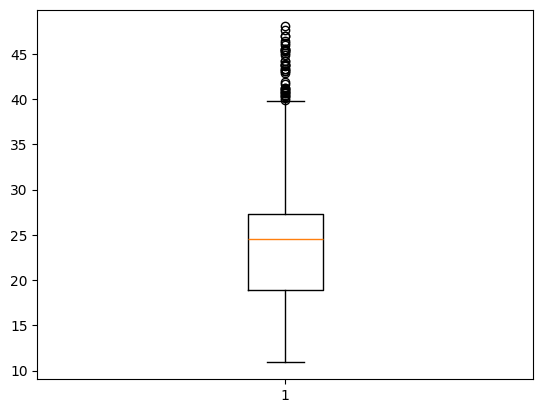

In [12]:
plt.boxplot(df['Y2'])

In [13]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        if column != 'Y1' and column!= 'Y2':  # Exclude the target variable
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
 
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
 
            # Replace outliers with Q1 or Q3
            df[column] = df[column].apply(
                lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
            )
 
    return df
 
df = replace_outliers_with_quartiles(df)

In [99]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
count,1296.000000,1296.000000,1296.0,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,0.0,0.0
mean,0.756595,672.918210,318.5,176.604167,5.250000,3.500000,0.240162,2.664352,22.307201,24.587760,NaN,NaN
std,0.016303,14.445110,0.0,34.759534,1.347671,0.860995,0.007548,0.778354,7.765374,7.321402,NaN,NaN
min,0.710000,637.000000,318.5,110.250000,3.500000,2.000000,0.234375,1.000000,6.010000,10.900000,NaN,NaN
25%,0.740000,661.500000,318.5,147.000000,3.500000,3.000000,0.234375,2.000000,15.417500,18.945000,NaN,NaN
50%,0.764167,671.708333,318.5,176.604167,5.250000,3.500000,0.234375,2.812500,22.307201,24.587760,NaN,NaN
75%,0.764167,686.000000,318.5,220.500000,7.000000,4.000000,0.250000,3.000000,24.717500,27.332500,NaN,NaN
max,0.790000,710.500000,318.5,220.500000,7.000000,5.000000,0.250000,4.000000,43.100000,48.030000,NaN,NaN


In [27]:
x= df.drop(columns=['Y1','Y2','Unnamed: 10','Unnamed: 11'],axis=1)
x

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.764167,661.500000,318.5,110.250000,7.00,2.0,0.234375,2.0000
1,0.764167,661.500000,318.5,110.250000,7.00,3.0,0.234375,2.0000
2,0.764167,661.500000,318.5,110.250000,7.00,4.0,0.234375,2.0000
3,0.764167,661.500000,318.5,110.250000,7.00,5.0,0.234375,2.0000
4,0.764167,661.500000,318.5,122.500000,7.00,2.0,0.234375,2.0000
...,...,...,...,...,...,...,...,...
1291,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1292,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1293,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125
1294,0.764167,671.708333,318.5,176.604167,5.25,3.5,0.234375,2.8125


In [28]:
y1=df['Y1']
y1

0       15.550000
1       15.550000
2       15.550000
3       15.550000
4       20.840000
          ...    
1291    22.307201
1292    22.307201
1293    22.307201
1294    22.307201
1295    22.307201
Name: Y1, Length: 1296, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.2)


In [30]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()


In [31]:
linear_model.fit(x_train,y1_train)

LinearRegression()

In [33]:
y1_pred= linear_model.predict(x_test)

In [34]:
y1_pred

array([15.84102751, 21.90206045, 36.54618061, 15.77266964, 21.90206045,
       11.81025714, 21.90206045, 16.19929751, 11.84443608, 21.90206045,
       31.38820947, 16.16511858, 36.97280848, 15.80684858, 32.18726619,
       21.90206045, 29.6668928 , 21.90206045, 21.90206045, 27.39161804,
       11.91279395, 27.19539357, 21.90206045, 12.20270607, 27.55366357,
       21.90206045, 29.02789121, 21.90206045, 21.90206045, 21.90206045,
       27.45997591, 16.23347645, 21.90206045, 15.93471517, 21.90206045,
       21.90206045, 12.04066054, 16.36134304, 21.90206045, 31.19198501,
       12.04066054, 21.90206045, 12.27106394, 21.90206045, 32.69154244,
       15.80684858, 21.90206045, 21.90206045, 16.23347645, 10.40033438,
       21.90206045, 16.16511858, 32.75990031, 21.90206045, 21.90206045,
        9.97370651,  6.34423422, 28.16534497, 32.56367585, 21.90206045,
       12.50146735, 21.90206045, 33.56094743, 31.3198516 , 21.90206045,
       15.80684858, 21.90206045, 21.90206045, 16.03725198, 21.90

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse= mean_squared_error(y1_test,y1_pred)
mse

7.894809327172453

In [36]:
r2 = r2_score(y1_test, y1_pred)
r2

0.8759839161907049

In [37]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(random_state = 0)
decision_regressor.fit(x_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [38]:
y1_pred = decision_regressor.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y1_test,y1_pred)
mse

4.26718567899033

In [41]:
r2= r2_score(y1_test,y1_pred)
r2

0.9329686589169314

In [48]:
from sklearn.linear_model import Lasso
alphas = [0.001, 0.01, 0.1, 1, 10]

mse_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y1_train)
    y_pred_lasso = lasso.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred_lasso)
    mse_scores.append(mse)
    print(f"Lasso Regression with alpha={alpha} - MSE: {mse}")

# Find the best alpha value
best_alpha = alphas[mse_scores.index(min(mse_scores))]
print(f"Best alpha: {best_alpha}")

Lasso Regression with alpha=0.001 - MSE: 7.999824452152864
Lasso Regression with alpha=0.01 - MSE: 10.170495917606948
Lasso Regression with alpha=0.1 - MSE: 10.760144905123672
Lasso Regression with alpha=1 - MSE: 10.869426887868265
Lasso Regression with alpha=10 - MSE: 11.764027850956952
Best alpha: 0.001


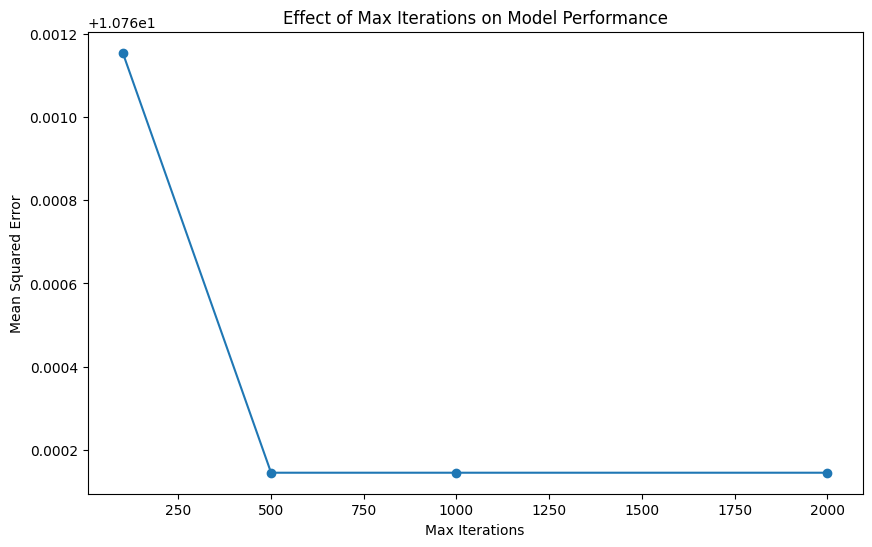

In [49]:
iterations = [100, 500, 1000, 2000]
mse_scores = []

for max_iter in iterations:
    lasso = Lasso(alpha=0.1, max_iter=max_iter)
    lasso.fit(x_train, y1_train)
    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(iterations, mse_scores, marker='o')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Max Iterations on Model Performance')
plt.show()

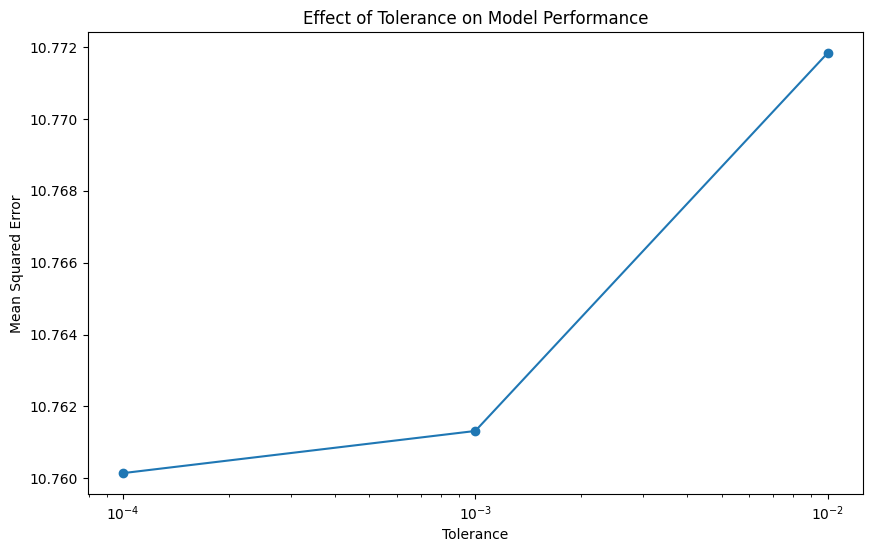

In [50]:
tolerances = [1e-4, 1e-3, 1e-2]
mse_scores = []

for tol in tolerances:
    lasso = Lasso(alpha=0.1, tol=tol)
    lasso.fit(x_train, y1_train)
    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(tolerances, mse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Tolerance')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Tolerance on Model Performance')
plt.show()

In [51]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.001,max_iter=500,tol=0.001)
lasso_reg.fit(x_train,y1_train)

Lasso(alpha=0.001, max_iter=500, tol=0.001)

In [52]:
y1_pred = lasso_reg.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y1_test,y1_pred)
mse
        

7.999826661384189

In [54]:
r2= r2_score(y1_test,y1_pred)
r2

0.8743342451244

In [ ]:
#Ridge Regression



In [55]:
from sklearn.linear_model import Ridge
alphas = [0.001, 0.01, 0.1, 1, 10]

mse_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y1_train)
    y_pred_lasso = ridge.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred_lasso)
    mse_scores.append(mse)
    print(f"Ridge Regression with alpha={alpha} - MSE: {mse}")

# Find the best alpha value
best_alpha = alphas[mse_scores.index(min(mse_scores))]
print(f"Best alpha: {best_alpha}")

Ridge Regression with alpha=0.001 - MSE: 7.896569385590998
Ridge Regression with alpha=0.01 - MSE: 8.040569761216537
Ridge Regression with alpha=0.1 - MSE: 9.157516494136711
Ridge Regression with alpha=1 - MSE: 10.399006700743417
Ridge Regression with alpha=10 - MSE: 10.645337126479877
Best alpha: 0.001


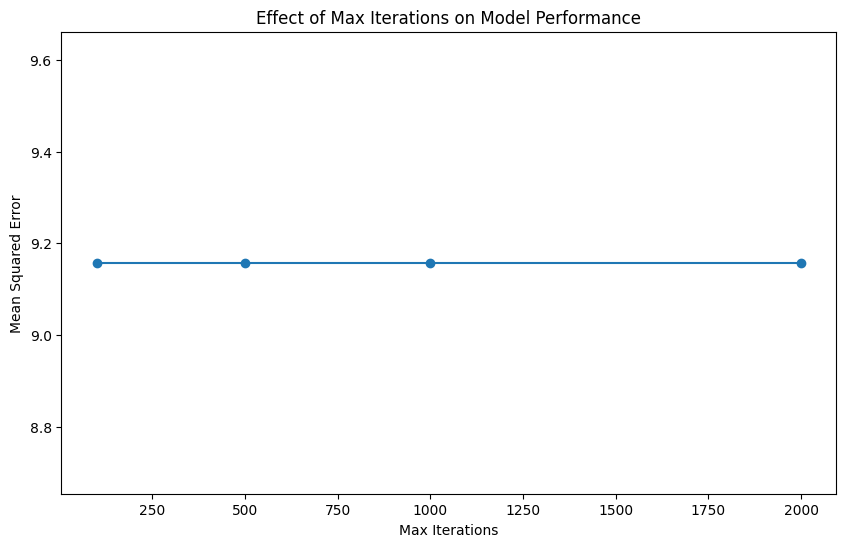

In [56]:
iterations = [100, 500, 1000, 2000]
mse_scores = []

for max_iter in iterations:
    ridge = Ridge(alpha=0.1, max_iter=max_iter)
    ridge.fit(x_train, y1_train)
    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(iterations, mse_scores, marker='o')
plt.xlabel('Max Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Max Iterations on Model Performance')
plt.show()

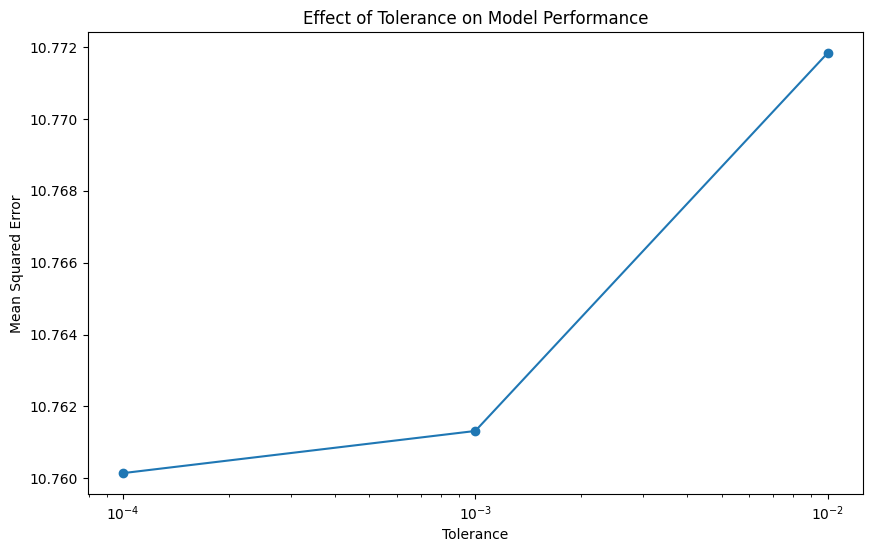

In [57]:
tolerances = [1e-4, 1e-3, 1e-2]
mse_scores = []

for tol in tolerances:
    lasso = Lasso(alpha=0.1, tol=tol)
    lasso.fit(x_train, y1_train)
    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y1_test, y_pred)
    mse_scores.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(tolerances, mse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Tolerance')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Tolerance on Model Performance')
plt.show()

In [58]:
from sklearn import linear_model
ridge_reg=linear_model.Ridge(alpha=0.001,max_iter=250,tol=0.001)
ridge_reg.fit(x_train,y1_train)

Ridge(alpha=0.001, max_iter=250, tol=0.001)

In [59]:
y_pred=ridge_reg.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(y1_test,y_pred)
mse

7.896569385590998

In [61]:
r2=r2_score(y1_test,y_pred)
r2

0.875956268207923

In [70]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
randomforestreg=RandomForestRegressor(n_estimators=100,random_state=42)
randomforestreg.fit(x_train,y1_train)

RandomForestRegressor(random_state=42)

In [71]:
y1_pred=randomforestreg.predict(x_test)

In [72]:
mse=mean_squared_error(y1_test,y1_pred)
mse

3.6335841382864986

In [73]:
r2=r2_score(y1_test,y1_pred)
r2

0.9429216265589969

In [74]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBreg=GradientBoostingRegressor(random_state=)


In [75]:
GBreg.fit(x_train,y1_train)

GradientBoostingRegressor(random_state=0)

In [76]:
y1_pred=GBreg.predict(x_test)

In [81]:
y1_train_pred=GBreg.predict(x_train)

In [77]:
mse= mean_squared_error(y1_test,y1_pred)
mse

2.6572725570825844

In [83]:
r2_train=r2_score(y1_train,y1_train_pred)
r2_test=r2_score(y1_test,y1_pred)
r2_train

0.9571835500154546

In [84]:
r2_test

0.9582580753395699

In [86]:
#Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Number of cross-validation folds
                           scoring='neg_mean_squared_error',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV
grid_search.fit(x_train, y1_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model
from sklearn.metrics import mean_squared_error
y1_pred = best_model.predict(x_test)
mse = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse}")

C:\Users\aditya.devdhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6480 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aditya.devdhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aditya.devdhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\aditya.devdhe\AppData\Local\Programs\Python\Pyth

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error: 2.5807566467640624


In [88]:
bestGBreg=GradientBoostingRegressor(n_estimators= 100,learning_rate=0.1,max_depth=3,min_samples_leaf=4,min_samples_split=10,subsample=1.0,max_features='log2',random_state=42 )
bestGBreg.fit(x_train,y1_train)

GradientBoostingRegressor(max_features='log2', min_samples_leaf=4,
                          min_samples_split=10, random_state=42)

In [89]:
y1_pred=bestGBreg.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y1_test,y1_pred)
mse

2.5807566467640624

In [97]:
r2= r2_score(y1_test,y1_pred)
r2

0.9594600300864877

In [98]:
import pickle
pickle_out= open("energy.pkl","wb")
pickle.dump(bestGBreg,pickle_out)
pickle_out.close()